# Métodos de Suavização de Holt e Holt-Winters 

por **Cibele Russo**

Baseado em 

- Moretting, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.
- Ehlers, R.S. (2009) Análise de Séries Temporais, http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf. Acessado em 28/06/2020.

Métodos de Holt e Holt-Winters:
- Metcalfe, Andrew V., and Cowpertwait, Paul S.P. Introductory time series with R. Springer-Verlag New York, 2009.
- Hyndman, R. J.; Athanasopoulous, G. Forecasting: principles and practice. OTexts, 2018. Material sobre Holt-Winters disponível em https://otexts.com/fpp2/holt-winters.html
- Holt, C. (1957). Forecasting trends and seasonals by exponentially weighted averages. O.W.R. Memorandum no.52, Carregie Institute of Technology.
- Winters, P. (1960). Forecasting sales by exponentially weighted moving averages. Management Science, 6:324–342.

Implementações:
- Brownlee, Jason. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.
- https://www.statsmodels.org/devel/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

- https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

## MMS e MMEP

Na aula anterior, vimos métodos de suavização médias móveis e médias móveis exponencialmente ponderadas considerando a seguinte decomposição de uma série temporal $\{Z_t\}$

$$Z_t = \mu_t + a_t, \mbox{ para } t=1,\ldots, N$$

com $E(a_t)=0$ e $Var(a_t) = \sigma^2$ e $\mu_t$ um parâmetro desconhecido.

Esses métodos não levam em consideração que a série tem uma componente de tendência.

São técnicas descritivas não aconselháveis para fazer previsão.


**Queremos estimar a tendência e a sazonalidade, e com isso já podemos fazer previsões!**


Considere inicialmente que a série temporal seja composta localmente por soma de nível, tendência e erro aleatório (ruído), com média zero e variância constante $\sigma^2_a$, isto é

$$Z_t = \mu_t + T_t + a_t, \mbox{ com  } t=1,\ldots, N.$$



## Método de Holt

Parecido com a MMEP, porém utiliza uma nova constante para modelar a **tendência**

Os valores do nível e da tendência da série, no instante $t$, serão estimados por

$\overline{Z}_t = A Z_t + (1-A)(\overline{Z}_{t-1} + \widehat{T}_{t-1}),\ 0<A<1 \mbox{ e } t=2,\ldots,N$

$\widehat{T}_t = C (\overline{Z}_t - \overline{Z}_{t-1}) + (1-C) \widehat{T}_{t-1},\ 0<C<1 \mbox{ e } t=2,\ldots,N,$

respectivamente, $A$ e $C$ são denominadas constantes de suavização.


### Previsão

A previsão para o valor $Z_{t+h}$ com origem em $t$ é dada por

$\widehat{Z}_{t} (h)= \overline{Z}_t + h \widehat{T}_{t},\ \forall h>0$

ou seja, adiciona-se ao valor básico $\overline{Z}_t$ a tendência multiplicada pelo número de passos à frente que se deseja prever $(h)$.


Para atualizar a previsão, quando tivermos uma nova observação $Z_{t+1}$, podemos fazer

$\overline{Z}_{t+1} = A Z_{t+1} + (1-A)(\overline{Z}_{t} + \widehat{T}_{t}),$

$\widehat{T}_{t+1} = C (\overline{Z}_{t+1} - \overline{Z}_{t}) + (1-C) \widehat{T}_{t}$

e a nova previsão do valor $Z_{t+h}$ dado que temos uma nova observação $Z_{t+1}$ será 

$$\widehat{Z}_{t+1}(h-1) = \overline{Z}_{t+1} + (h-1)\widehat{T}_{t+1}.$$

Precisamos assumir hipóteses sobre os valores iniciais, por exemplo, assumir que $\widehat{T}_2 = Z_2-Z_1$ e $\overline{Z}_2 = Z_2$. Se $Z_t$ for gerado por um processo $ARIMA(0,2,2)$, essa previsão será ótima.


As constantes $A$ e $C$ são escolhidas de forma que a soma dos erros quadráticos de previsão seja mínimo. 

## Método de Holt-Winters

Para séries com padrão de comportamento mais complexo, existem outras formas de suavização, tais com os métodos de Holt-Winters.

Considere uma série sazonal com período $s$.

### Modelo com sazonalidade multiplicativa e tendência aditiva

$$Z_t = \mu_t F_t + T_t + a_t, \mbox{ com  } t=1,\ldots, N.$$

As três equações de suavização são dadas por

$\widehat{F}_t = D \left(\displaystyle\frac{Z_t}{\overline{Z}_t}\right) + (1-D)\widehat{F}_{t-s}, 0<D<1, t=s+1,\ldots,N$

$\overline{Z}_t = A  \left(\displaystyle\frac{Z_t}{\widehat{F}_{t-s}}\right) + (1-A)(\overline{Z}_{t-1} + \widehat{T}_{t-1}),\ 0<A<1 \mbox{ e } t=s+1,\ldots,N$

$\widehat{T}_t = C (\overline{Z}_t - \overline{Z}_{t-1}) + (1-C) \widehat{T}_{t-1},\ 0<C<1 \mbox{ e } t=s+1,\ldots,N,$

e representam estimativas do fator sazonal, do nível e da tendência, respectivamente, e $A$, $C$ e $D$ são constantes de suavização.




### Previsão


$\widehat{Z}_t(h) = (\overline{Z}_t+h \widehat{T}_t)\widehat{F}_{t+h-s}, h=1,2,\ldots,s$

$\widehat{Z}_t(h) = (\overline{Z}_t+h \widehat{T}_t)\widehat{F}_{t+h-2s}, h=s+1,\ldots,2s$

$\vdots \ \  \ \  =\ \  \ \   \vdots$

onde $\overline{Z}_t$, $\widehat{F}_t$ e $\widehat{T}_t$ são obtidos das equações do método.

Para fazermos atualizações das previsões, quando temos uma nova observação $Z_{t+1}$, utilizamos os valores

$\widehat{F}_{t+1} = D \displaystyle\left(\frac{Z_{t+1}}{\overline{Z}_{t+1}}\right) + (1-D)\widehat{F}_{{t+1}-s},$

$\overline{Z}_{t+1} = A  \displaystyle\left(\frac{Z_{t+1}}{\widehat{F}_{{t+1}-s}}\right) + (1-A)(\overline{Z}_{t} + \widehat{T}_{t}),$

$\widehat{T}_{t+1} = C (\overline{Z}_{t+1} - \overline{Z}_{t}) + (1-C) \widehat{T}_{t},$

e a nova previsão para a observação $Z_{t+h}$ será

$\widehat{Z}_{t+1}(h-1) = (\overline{Z}_{{t+1}}+(h-1)\widehat{T}_{t+1})\widehat{F}_{t+1+h-s}, h=1,2,\ldots,s+1$

$\widehat{Z}_{t+1}(h-1) = (\overline{Z}_{{t+1}}+(h-1)\widehat{T}_{t+1})\widehat{F}_{t+1+h-2s}, h=s+2,\ldots, 2s+1$


Também é necessário fazer suposições sobre os valores iniciais para o processo.

### Modelo com sazonalidade e tendência aditivas

$$Z_t = \mu_t + T_t +F_t+ a_t, \mbox{ com  } t=1,\ldots, N.$$

As estimativas do fator sazonal, do nível e da tendência da série são dadas por 

$\widehat{F}_t = D   ({Z}_t - \overline{Z}_{t})+ (1-D)\widehat{F}_{t-s}, 0<D<1, t=s+1,\ldots,N$

$\overline{Z}_t = A  (Z_t - \widehat{F}_{t-s}) + (1-A)(\overline{Z}_{t-1} + \widehat{T}_{t-1}),\ 0<A<1 \mbox{ e } t=s+1,\ldots,N$

$\widehat{T}_t = C (\overline{Z}_t - \overline{Z}_{t-1}) + (1-C) \widehat{T}_{t-1},\ 0<C<1 \mbox{ e } t=s+1,\ldots,N,$

respectivamente, e $A$, $C$ e $D$ são constantes de suavização e são estimadas de forma que minimizem a soma dos quadrados dos erros dos ajustes.

### Previsão


$\widehat{Z}_t(h) = \overline{Z}_t+h \widehat{T}_t + \widehat{F}_{t+h-s}, h=1,2,\ldots,s$

$\widehat{Z}_t(h) = \overline{Z}_t+h \widehat{T}_t + \widehat{F}_{t+h-2s}, h=s+1,\ldots,2s$

$\vdots \ \  \ \  =\ \  \ \   \vdots$

onde $\overline{Z}_t$, $\widehat{F}_t$ e $\widehat{T}_t$ são obtidos das equações do método.

Para fazermos atualizações das previsões, quando temos uma nova observação $Z_{t+1}$, utilizamos os valores

$\widehat{F}_{t+1} = D   (Z_{t+1} - \overline{Z}_{t+1})+ (1-D)\widehat{F}_{t+1-s}, $

$\overline{Z}_{t+1} = A  (Z_{t+1} - \widehat{F}_{{t+1}-s}) + (1-A)(\overline{Z}_{{t}} + \widehat{T}_{{t}}),$

$\widehat{T}_{t+1} = C (\overline{Z}_{t+1} - \overline{Z}_{t}) + (1-C) \widehat{T}_{t},$


e a nova previsão para a observação $Z_{t+h}$ será

$\widehat{Z}_{t+1}(h-1) = \overline{Z}_{{t+1}}+(h-1)\widehat{T}_{t+1} + \widehat{F}_{t+1+h-s}, h=1,2,\ldots,s+1$

$\widehat{Z}_{t+1}(h-1) = \overline{Z}_{{t+1}}+(h-1)\widehat{T}_{t+1}+\widehat{F}_{t+1+h-2s}, h=s+2,\ldots, 2s+1$

Também é necessário fazer suposições sobre os valores iniciais para o processo.

Se $Z_t$ for gerado por um processo $ARIMA$, essa previsão será ótima.



## Visão geral de vantagens e desvantagens dos métodos de suavização

### Média móvel simples

- Simples implementação;

- Aplicável mesmo com um número pequeno de observações;

- Flexibilidade de acordo com o tamanho da janela

Porém

- Método descritivo e não recomendável para previsões

- Não leva em consideração a componente de tendência na série


### Média móvel exponencialmente ponderada

- Fácil compreensão e aplicabilidade;

- Necessidade de armazenar somente $Z_t$, $\overline{Z}_t$ e $\alpha$

Porém

- Método descritivo e não recomendável para previsões

- Não leva em consideração a componente de tendência na série

### Método de Holt

- Pode ser usado para prever séries que tem tendência

- Apresenta um nível maior de dificuldade para encontrar os valores apropriados para as constantes de suavização $A$ e $C$, em geral que minimizem a soma dos quadrados dos erros dos ajustes

### Método de Holt-Winters

- Pode ser usado para prever séries que tem tendência e sazonalidade, seja ela aditiva ou multiplicativa

Porém

- Impossibilidade e dificuldade para estudar propriedades estatísticas como média e variância das previsões, e consequentemente construção de intervalos de confiança para as previsões

- Nível maior de dificuldade para encontrar os valores apropriados para as constantes de suavização $A$, $C$ e $D$, em geral que minimizem a soma dos quadrados dos erros dos ajustes

### Aplicação: dados de passageiros aéreos

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")


In [2]:
pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'

passageiros = pd.read_csv('airline_passengers.csv', index_col=0, parse_dates=True)

passageiros.head()

,Milhares de passageiros
Mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
passageiros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Mês', length=144, freq=None)

**Estabeleça a frequência do DatetimeIndex!**

Para construir um modelo de suavização Holt-Winters, o pacote statsmodels precisa saber a frequência dos dados. Para os dados de passageiros aéreos, as observações são coletadas no início do mês, usaremos MS.

Veja <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>aqui</a> uma lista de possibilidades.

In [4]:
passageiros.index.freq = 'MS'
passageiros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Mês', length=144, freq='MS')


## Suavização exponencial simples

Uma variação da função Holt-Winters de statsmodels apresenta a Suavização exponencial simples, que fornece os mesmos cálculos da média móvel exponencialmente ponderada do método .ewm do pandas que vimos na última aula. 

 $\begin{split}\overline{Z}_0 &= Z_1 \\
\overline{Z}_t &= (1 - \alpha) Z_{t-1} + \alpha Z_t,\end{split}$


In [5]:
# É possível ajustar a MMEP usando o pacote statsmodels.tsa.holtwinters e a função SimpleExpSmoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

passageiros['MMEP12'] = passageiros['Milhares de passageiros'].ewm(alpha=alpha,adjust=False).mean()
passageiros['SES12'] = SimpleExpSmoothing(passageiros['Milhares de passageiros']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
passageiros.head()

,Milhares de passageiros,MMEP12,SES12
Mês,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


## Método de Holt

In [6]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing


modelo =  ExponentialSmoothing(passageiros['Milhares de passageiros'], trend='add');

ajustado = modelo.fit();

passageiros['Holt'] = ajustado.fittedvalues.shift(-1);

passageiros.head()



,Milhares de passageiros,MMEP12,SES12,Holt
Mês,,,,
1949-01-01,112,112.000000,112.000000,114.221156
1949-02-01,118,112.923077,112.923077,120.175837
1949-03-01,132,115.857988,115.857988,134.115056
1949-04-01,129,117.879836,117.879836,131.244976
1949-05-01,121,118.359861,118.359861,123.283465


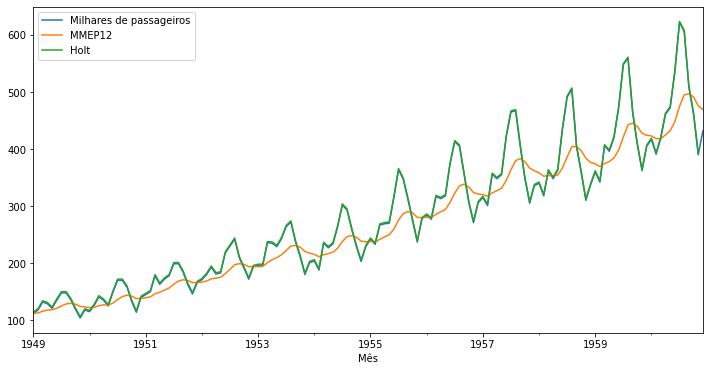

In [7]:
passageiros[['Milhares de passageiros','MMEP12','Holt']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

**Podemos notar que o método de Holt já apresenta um ajuste bem melhor do que a MMEP!**

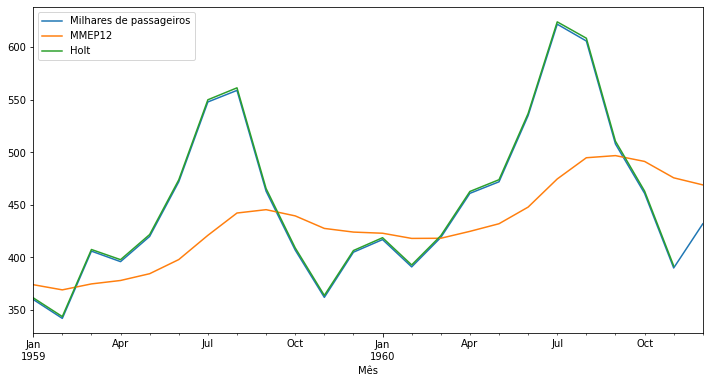

In [8]:
passageiros[['Milhares de passageiros','MMEP12','Holt']].iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Método de Holt-Winters - sazonalidade aditiva ou multiplicativa

In [9]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva

modelo =  ExponentialSmoothing(passageiros['Milhares de passageiros'],trend='add',seasonal='add',seasonal_periods=12);

ajustado = modelo.fit();

passageiros['Holt-Winters-adit-12'] = ajustado.fittedvalues;

passageiros.head()


,Milhares de passageiros,MMEP12,SES12,Holt,Holt-Winters-adit-12
Mês,,,,,
1949-01-01,112,112.000000,112.000000,113.474828,112.001172
1949-02-01,118,112.923077,112.923077,119.464366,120.168193
1949-03-01,132,115.857988,115.857988,133.477561,134.698694
1949-04-01,129,117.879836,117.879836,130.543312,131.376310
1949-05-01,121,118.359861,118.359861,122.528126,124.628035


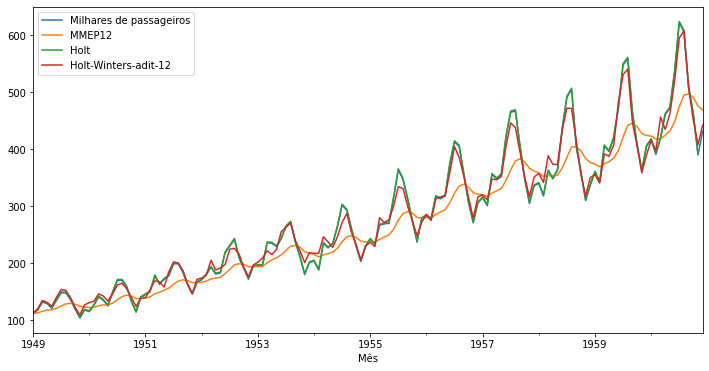

In [10]:
passageiros[['Milhares de passageiros','MMEP12','Holt', 'Holt-Winters-adit-12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [11]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade multiplicativa

modelo =  ExponentialSmoothing(passageiros['Milhares de passageiros'],trend='add',seasonal='mul',seasonal_periods=12)

ajustado = modelo.fit()

passageiros['Holt-Winters-mult-12'] = ajustado.fittedvalues

passageiros.tail()

,Milhares de passageiros,MMEP12,SES12,Holt,Holt-Winters-adit-12,Holt-Winters-mult-12
Mês,,,,,,
1960-08-01,606,494.898619,494.898619,608.663524,608.232993,625.008805
1960-09-01,508,496.914216,496.914216,510.647750,507.657433,506.744546
1960-10-01,461,491.388952,491.388952,463.183514,451.325925,443.212972
1960-11-01,390,475.790652,475.790652,391.990823,407.931791,393.493617
1960-12-01,432,469.053629,NaN,NaN,442.599950,432.350962


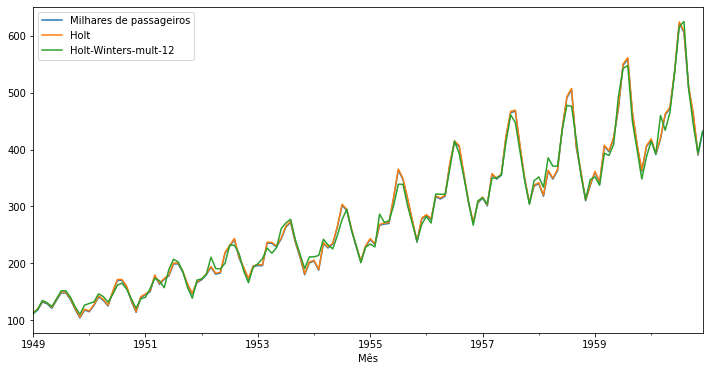

In [12]:
passageiros[['Milhares de passageiros','Holt','Holt-Winters-mult-12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

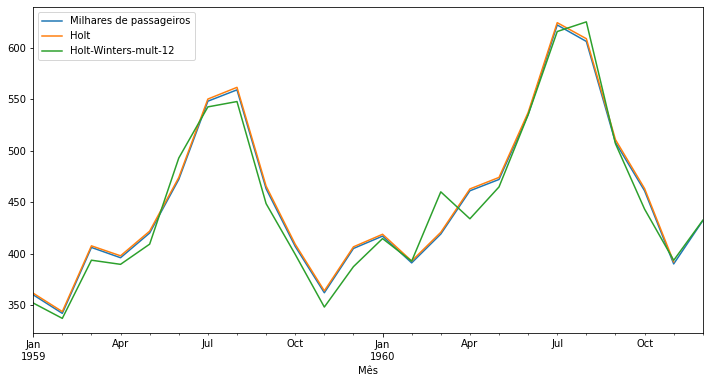

In [13]:
## Olhando somente para os últimos dois anos

passageiros[['Milhares de passageiros','Holt','Holt-Winters-mult-12']].iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Aparentemente, o método de Holt está performando melhor para esses dados. 

Vamos ver como se comportam na predição de observações futuras?


In [14]:
len(passageiros)

144


## Previsão com o método Holt-Winters

Neste exemplo, usaremos o mesmo conjunto de dados airlines_passengers e os dividiremos em 108 registros de treinamento e 36 registros de teste. Em seguida, avaliaremos o desempenho do modelo.


In [15]:
import pandas as pd
import numpy as np
%matplotlib inline

pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'


passageiros = pd.read_csv(f'{pkgdir}/airline_passengers.csv',index_col='Mês',parse_dates=True)
passageiros.index.freq = 'MS'
passageiros.head()

,Milhares de passageiros
Mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
passageiros.tail()

,Milhares de passageiros
Mês,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [17]:
passageiros.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Milhares de passageiros  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Divisão da base em treino e teste

In [8]:
dados_treino = passageiros.iloc[:108] # Dados de treinamento até observação 108, sem incluí-la
dados_teste = passageiros.iloc[108:] # Dados de teste a partir da observação 108

## Ajuste do modelo

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ajustado_HW = ExponentialSmoothing(dados_treino['Milhares de passageiros'],trend='add',seasonal='mul',seasonal_periods=12).fit()
       

## Avaliação do modelo com predições para dados de teste

In [11]:
predito_HW = ajustado_HW.forecast(36).rename('Previsão Holt-Winters')#forecast faz a previsao



In [21]:
predito_HW.head()

1958-01-01    343.512143
1958-02-01    335.465300
1958-03-01    388.892014
1958-04-01    378.396615
1958-05-01    379.937279
Freq: MS, Name: Previsão Holt-Winters, dtype: float64

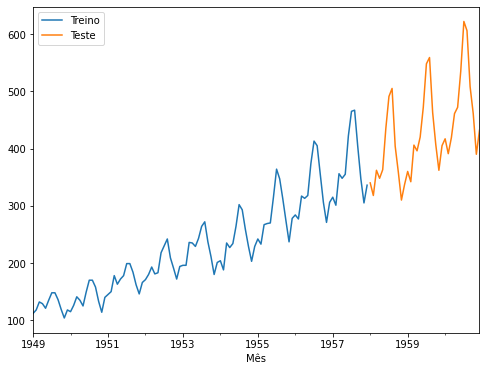

In [22]:
dados_treino['Milhares de passageiros'].plot(legend=True,label='Treino')
dados_teste['Milhares de passageiros'].plot(legend=True,label='Teste',figsize=(8,6));

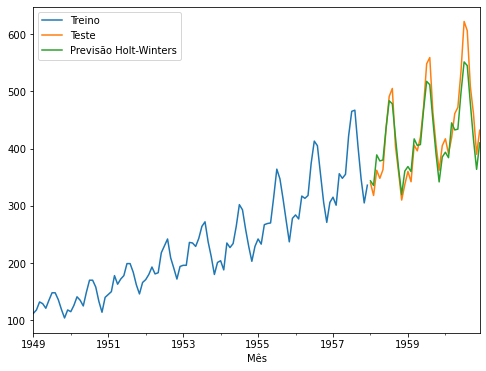

In [12]:
dados_treino['Milhares de passageiros'].plot(legend=True,label='Treino')
dados_teste['Milhares de passageiros'].plot(legend=True,label='Teste',figsize=(8,6))

predito_HW.plot(legend=True,label='Previsão Holt-Winters');



**Exercício: Obtenha a previsão pelo Método de Holt**


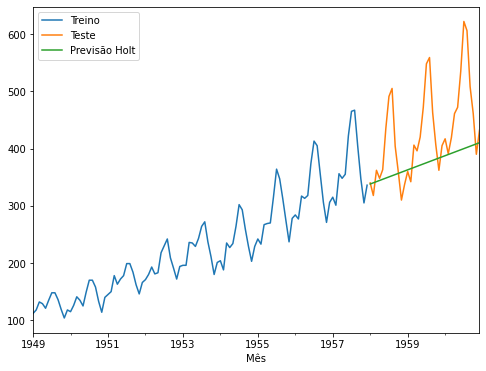

In [24]:
ajustado_H = ExponentialSmoothing(dados_treino['Milhares de passageiros'],trend='add').fit()   
predito_H = ajustado_H.forecast(36).rename('Previsão Holt')


dados_treino['Milhares de passageiros'].plot(legend=True,label='Treino')
dados_teste['Milhares de passageiros'].plot(legend=True,label='Teste',figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt');

## Métricas de avaliação dos ajustes

Para avaliar a distância da predição para o valor ajustado, usamos o erro quadrático médio e o erro absoluto médio

### Erro quadrático médio


$EQM = MSE = \displaystyle\sum_ {i=t+1}^{k}\frac{({Z_i - \widehat{Z}_i})^2}{k-t-1}$


### Erro absoluto médio

$EAM = MAE =  \displaystyle\sum_ {i=t+1}^{k}\frac{|{Z_t - \widehat{Z}_t}|}{k-t-1}$


In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
mean_absolute_error(dados_teste,predito_HW)

22.62942688261434

In [27]:
mean_absolute_error(dados_teste,predito_H)

63.247070333357215

In [28]:
mean_squared_error(dados_teste,predito_HW)

749.0387591434284

In [29]:
mean_squared_error(dados_teste,predito_H)

7774.333070488191

In [30]:
np.sqrt(mean_squared_error(dados_teste,predito_HW))

27.368572471786475

In [31]:
np.sqrt(mean_squared_error(dados_teste,predito_H))

88.17217855133325

In [32]:
dados_teste.describe()

,Milhares de passageiros
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [33]:
predito_HW.describe()

count     36.000000
mean     418.349892
std       59.952246
min      319.756621
25%      375.928422
50%      408.393944
75%      453.699921
max      551.341728
Name: Previsão Holt-Winters, dtype: float64

In [34]:
predito_H.describe()

count     36.000000
mean     374.124330
std       21.711608
min      338.060774
25%      356.092552
50%      374.124330
75%      392.156108
max      410.187886
Name: Previsão Holt, dtype: float64

## Previsão para os dados da COVID-19

In [21]:
# Dados de COVID-19 no estado de SP

import pandas as pd
import numpy as np
%matplotlib inline

pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'

covidSP = pd.read_csv('covidSP.csv', index_col=0, parse_dates=True) 

covidSP.index = pd.to_datetime(covidSP.index)

In [22]:
covidSP.head()

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0


In [23]:
covidSP.index.min()

Timestamp('2020-02-26 00:00:00')

In [24]:
covidSP.index.max()

Timestamp('2020-12-30 00:00:00')

In [25]:
#nao podemos ter dados faltantes para as previsões entao fazemos a funcao abaixo que mapeia todas as datas do periodo
idx = pd.date_range(start='2020-02-28', end='2020-12-30', freq='D')
idx

DatetimeIndex(['2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=307, freq='D')

In [26]:
covidSP = covidSP.reindex(idx)
covidSP.head(30)

,confirmed,deaths
2020-02-28,1.0,0.0
2020-02-29,0.0,0.0
2020-03-01,0.0,0.0
2020-03-02,0.0,0.0
2020-03-03,0.0,0.0
2020-03-04,1.0,0.0
2020-03-05,3.0,0.0
2020-03-06,4.0,0.0
2020-03-07,3.0,0.0
2020-03-08,3.0,0.0


In [27]:
covidSP.fillna(0,inplace=True)
covidSP.head(30)

,confirmed,deaths
2020-02-28,1.0,0.0
2020-02-29,0.0,0.0
2020-03-01,0.0,0.0
2020-03-02,0.0,0.0
2020-03-03,0.0,0.0
2020-03-04,1.0,0.0
2020-03-05,3.0,0.0
2020-03-06,4.0,0.0
2020-03-07,3.0,0.0
2020-03-08,3.0,0.0


In [28]:
len(covidSP)

307

In [29]:
covidSP.index

DatetimeIndex(['2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=307, freq='D')

## Divisão da base em treino e teste


In [37]:
dados_treino = covidSP.iloc[:286] # Dados de treinamento até observação 240, sem incluí-la
dados_teste = covidSP.iloc[286:] # Dados de teste a partir da observação 240

In [38]:
dados_treino

,confirmed,deaths
2020-02-28,1.0,0.0
2020-02-29,0.0,0.0
2020-03-01,0.0,0.0
2020-03-02,0.0,0.0
2020-03-03,0.0,0.0
...,...,...
2020-12-05,8938.0,181.0
2020-12-06,2675.0,46.0
2020-12-07,1116.0,25.0
2020-12-08,7923.0,242.0


In [39]:
## Ajuste do modelo
from statsmodels.tsa.holtwinters import ExponentialSmoothing


ajustado = ExponentialSmoothing(dados_treino['deaths'],trend='add',seasonal='add',seasonal_periods=7).fit()

In [40]:
# Previsão

predito = ajustado.forecast(21).rename('Previsão Holt-Winters')

In [41]:
predito.index = covidSP.index[286:]
predito.index

DatetimeIndex(['2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
               '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30'],
              dtype='datetime64[ns]', freq='D')

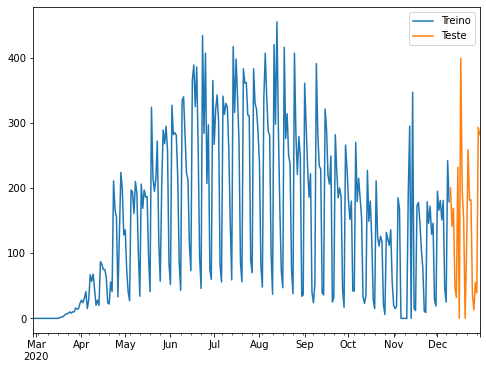

In [42]:
dados_treino['deaths'].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6));


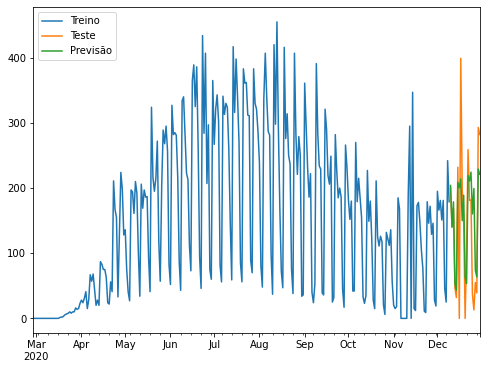

In [43]:
dados_treino['deaths'].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6))
predito.plot(legend=True,label='Previsão');

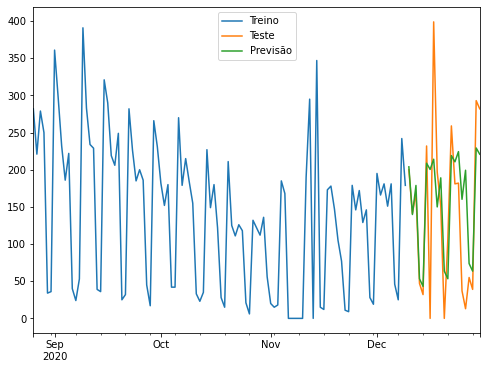

In [44]:
dados_treino['deaths'].iloc[180:].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6))
predito.plot(legend=True,label='Previsão');

In [45]:
## Ajuste do modelo com sazonalidade multiplicativa
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Precisamos considerar somente os dados positivos, mas vamos considerar os dados entre o início de maio e o início de setembro

In [46]:
covidSP = covidSP.loc['2020-05-01':'2020-09-01']

In [47]:
len(covidSP)

124

In [48]:
dados_treino = covidSP.iloc[:103] # Dados de treinamento até observação 240, sem incluí-la
dados_teste = covidSP.iloc[103:] # Dados de teste a partir da observação 240

In [49]:
ajustado = ExponentialSmoothing(dados_treino['deaths'],trend='add',seasonal='mul',seasonal_periods=7).fit()

In [50]:
predito = ajustado.forecast(21).rename('Previsão Holt-Winters')
predito.index = covidSP.index[103:]


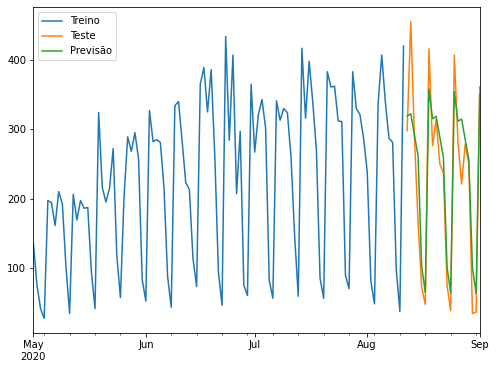

In [51]:
dados_treino['deaths'].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6))
predito.plot(legend=True,label='Previsão');

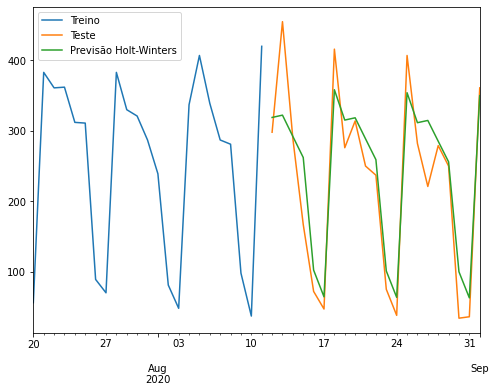

In [52]:
dados_treino['deaths'].iloc[80:].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6))
predito.plot(legend=True,label='Previsão Holt-Winters');